In [570]:
import os
import glob
import pandas as pd
import numpy as np
import statistics
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import sys
from copy import deepcopy
from random import randrange
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.svm import SVR
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [571]:
bitcoin = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', vs_currency = 'usd', from_timestamp = '1420070400', to_timestamp ='1609459200')

In [572]:
bitcoin_prices = bitcoin.get("prices")
bitcoin_array_prices = np.array(bitcoin_prices)
print(bitcoin_prices)

[[1420070400000, 313.9920000000001], [1420156800000, 314.446], [1420243200000, 286.572], [1420329600000, 260.936], [1420416000000, 273.22], [1420502400000, 285.3738000000001], [1420588800000, 295.8725], [1420675200000, 284.4525], [1420761600000, 289.5738000000001], [1420848000000, 274.533], [1420934400000, 267.184], [1421020800000, 268.353667700943], [1421107200000, 221.436], [1421193600000, 172.1479], [1421280000000, 210.5559], [1421366400000, 205.816], [1421452800000, 199.4914], [1421539200000, 208.9892], [1421625600000, 214.545], [1421712000000, 210.5137], [1421798400000, 224.0451], [1421884800000, 232.0423000000001], [1421971200000, 232.898], [1422057600000, 248.096], [1422144000000, 253.8388999999999], [1422230400000, 271.2882000000001], [1422316800000, 259.2356], [1422489600000, 232.5329422304941], [1422576000000, 228.6354], [1422662400000, 218.0233], [1422748800000, 226.2697], [1422835200000, 240.0193], [1422921600000, 226.0119], [1423008000000, 225.3083], [1423094400000, 216.91

In [573]:
bitcoin_df = pd.DataFrame(bitcoin_array_prices, columns = ["UTC_timestamp", "price"])
print(bitcoin_df)

      UTC_timestamp         price
0      1.420070e+12    313.992000
1      1.420157e+12    314.446000
2      1.420243e+12    286.572000
3      1.420330e+12    260.936000
4      1.420416e+12    273.220000
...             ...           ...
2187   1.609114e+12  26423.228792
2188   1.609200e+12  27125.384121
2189   1.609286e+12  27424.538955
2190   1.609373e+12  28837.288529
2191   1.609459e+12  29022.418395

[2192 rows x 2 columns]


In [574]:
bitcoin_df["UTC_timestamp"] = pd.to_datetime(bitcoin_df["UTC_timestamp"], origin = 'unix', unit = 'ms')
print(bitcoin_df)

     UTC_timestamp         price
0       2015-01-01    313.992000
1       2015-01-02    314.446000
2       2015-01-03    286.572000
3       2015-01-04    260.936000
4       2015-01-05    273.220000
...            ...           ...
2187    2020-12-28  26423.228792
2188    2020-12-29  27125.384121
2189    2020-12-30  27424.538955
2190    2020-12-31  28837.288529
2191    2021-01-01  29022.418395

[2192 rows x 2 columns]


In [575]:
test_df = bitcoin_df.copy(deep = True)

In [576]:
bitcoin_df.set_index("UTC_timestamp", inplace=True)
test_df.set_index("UTC_timestamp", inplace=True)
print(test_df)

                      price
UTC_timestamp              
2015-01-01       313.992000
2015-01-02       314.446000
2015-01-03       286.572000
2015-01-04       260.936000
2015-01-05       273.220000
...                     ...
2020-12-28     26423.228792
2020-12-29     27125.384121
2020-12-30     27424.538955
2020-12-31     28837.288529
2021-01-01     29022.418395

[2192 rows x 1 columns]


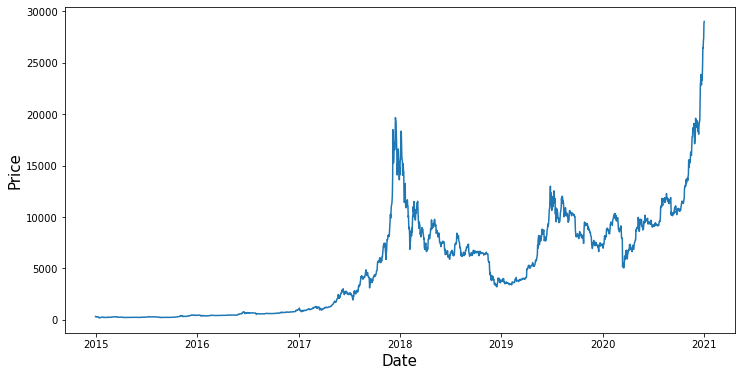

In [478]:
plt.figure(figsize = (12,6))
plt.plot(bitcoin_df["price"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [479]:
bitcoin_train = bitcoin_df.copy(deep = True)
bitcoin_train = bitcoin_train.reset_index()
print(bitcoin_train)
bitcoin_train.dtypes

     UTC_timestamp         price
0       2015-01-01    313.992000
1       2015-01-02    314.446000
2       2015-01-03    286.572000
3       2015-01-04    260.936000
4       2015-01-05    273.220000
...            ...           ...
2187    2020-12-28  26423.228792
2188    2020-12-29  27125.384121
2189    2020-12-30  27424.538955
2190    2020-12-31  28837.288529
2191    2021-01-01  29022.418395

[2192 rows x 2 columns]


UTC_timestamp    datetime64[ns]
price                   float64
dtype: object

In [480]:
regular_dates = bitcoin_train["UTC_timestamp"]

In [516]:
bitcoin_train["UTC_timestamp"] = bitcoin_train["UTC_timestamp"].map(mdates.date2num)
bitcoin_train.head(5)
print(regular_dates)
print(type(bitcoin_train))

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
2187   2020-12-28
2188   2020-12-29
2189   2020-12-30
2190   2020-12-31
2191   2021-01-01
Name: UTC_timestamp, Length: 2192, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>


In [482]:
X_Train_dates = bitcoin_train["UTC_timestamp"].values
Y_Train_prices = bitcoin_df["price"].values

In [483]:
print(X_Train_dates)

[16436. 16437. 16438. ... 18626. 18627. 18628.]


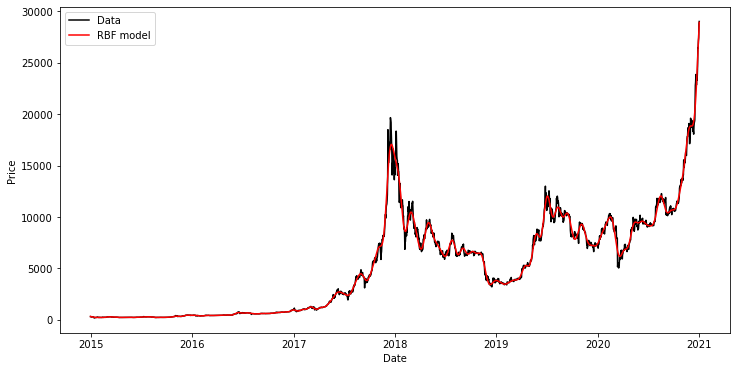

In [545]:
#Convert to 1d Vector
X_Train_dates = np.reshape(dates, (len(dates), 1))
Y_Train_prices = np.reshape(prices, (len(prices), 1))

svr_rbf = SVR(kernel= 'rbf', C = 1e5, gamma= 0.001)
svr_rbf.fit(X_Train_dates, Y_Train_prices)

plt.figure(figsize = (12,6))
plt.plot(X_Train_dates, Y_Train_prices, color= 'black', label= 'Data')
plt.plot(regular_dates, svr_rbf.predict(X_Train_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Forecasting for the RBF kernalized SVR (14 days out)

In [552]:
forecast_14 = 14 #number of days ahead to forecast

In [553]:
prediction_14 = [] # filling list with timedelta values for prediction
for x in range(forecast_14):
    prediction_14.append(np.datetime64('2021-01-01') - np.datetime64(-(x+1), 'D'))
print(prediction_14)

[numpy.timedelta64(18629,'D'), numpy.timedelta64(18630,'D'), numpy.timedelta64(18631,'D'), numpy.timedelta64(18632,'D'), numpy.timedelta64(18633,'D'), numpy.timedelta64(18634,'D'), numpy.timedelta64(18635,'D'), numpy.timedelta64(18636,'D'), numpy.timedelta64(18637,'D'), numpy.timedelta64(18638,'D'), numpy.timedelta64(18639,'D'), numpy.timedelta64(18640,'D'), numpy.timedelta64(18641,'D'), numpy.timedelta64(18642,'D')]


In [554]:
prediction_14 = np.reshape(prediction_14, (len(prediction), 1))
print(svr_rbf.predict(prediction_14)) #feeding in timedelta values to predict future prices

[29486.54204782 30002.12363595 30475.71055252 30901.90855278
 31275.82361655 31593.12247713 31850.0826373  32043.63136699
 32171.37341793 32231.60742341 32223.33117297 32146.23615707
 32000.691962   31787.72125798]


In [557]:
forecast_dates_14 = [] #filling in list with forecasting dates in a regular format
for x in range(forecast_14):
    forecast_dates_14.append(np.datetime64('2021-01-01') + np.timedelta64(x, 'D'))
print(forecast_dates_14)

[numpy.datetime64('2021-01-01'), numpy.datetime64('2021-01-02'), numpy.datetime64('2021-01-03'), numpy.datetime64('2021-01-04'), numpy.datetime64('2021-01-05'), numpy.datetime64('2021-01-06'), numpy.datetime64('2021-01-07'), numpy.datetime64('2021-01-08'), numpy.datetime64('2021-01-09'), numpy.datetime64('2021-01-10'), numpy.datetime64('2021-01-11'), numpy.datetime64('2021-01-12'), numpy.datetime64('2021-01-13'), numpy.datetime64('2021-01-14')]


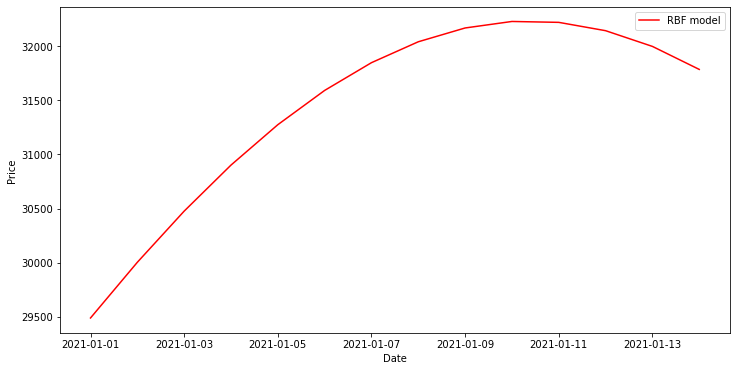

In [558]:
plt.figure(figsize = (12,6))
plt.plot(forecast_dates_14, svr_rbf.predict(prediction14), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Forecasting for the RBF kernalized SVR (7 days out)

In [559]:
forecast_7 = 7
prediction_7 = [] # filling list with timedelta values for prediction
for x in range(forecast_7):
    prediction_7.append(np.datetime64('2021-01-01') - np.datetime64(-(x+1), 'D'))
print(prediction_7)

[numpy.timedelta64(18629,'D'), numpy.timedelta64(18630,'D'), numpy.timedelta64(18631,'D'), numpy.timedelta64(18632,'D'), numpy.timedelta64(18633,'D'), numpy.timedelta64(18634,'D'), numpy.timedelta64(18635,'D')]


In [577]:
prediction_7 = np.reshape(prediction_7, (len(prediction_7), 1))
prediction_7_list = svr_rbf.predict(prediction_7)
print(prediction_7_list) #feeding in timedelta values to predict future prices

[29486.54204782 30002.12363595 30475.71055252 30901.90855278
 31275.82361655 31593.12247713 31850.0826373 ]


In [563]:
forecast_dates_7 = [] #filling in list with forecasting dates in a regular format
for x in range(forecast_7):
    forecast_dates_7.append(np.datetime64('2021-01-01') + np.timedelta64(x, 'D'))
print(forecast_dates_7)

[numpy.datetime64('2021-01-01'), numpy.datetime64('2021-01-02'), numpy.datetime64('2021-01-03'), numpy.datetime64('2021-01-04'), numpy.datetime64('2021-01-05'), numpy.datetime64('2021-01-06'), numpy.datetime64('2021-01-07')]


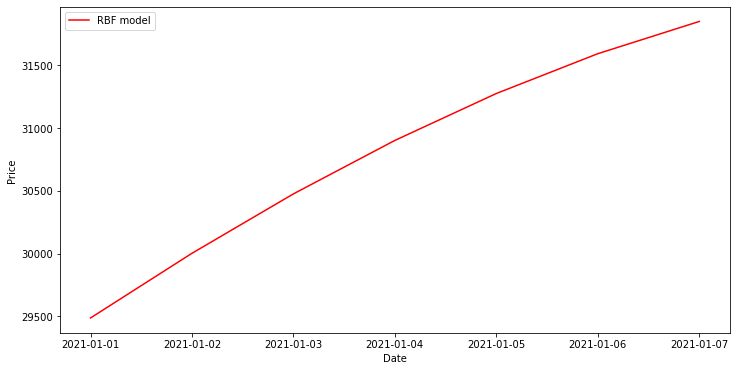

In [564]:
plt.figure(figsize = (12,6))
plt.plot(forecast_dates_7, svr_rbf.predict(prediction_7), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()